## **Reseñas de cerveza de Beer Advocate**

#### **Acerca de este conjunto de datos**

¿Te encanta la cerveza? ¿Te encanta probar nuevas cervezas y calificarlas? ¡Pues este conjunto de datos es perfecto para ti! Contiene 1,5 millones de reseñas de cervezas de Beer Advocate, lo que lo hace ideal para poner a prueba tus habilidades con los datos. Los datos incluyen calificaciones en función de cinco aspectos: apariencia, aroma, paladar, sabor e impresión general. Las reseñas también incluyen información sobre el producto y el usuario. ¿A qué estás esperando? ¡Empieza hoy mismo!

#### **Cómo utilizar el conjunto de datos**

Este gran conjunto de datos de Beer Advocate consta de 1,5 millones de reseñas de cerveza, lo que lo hace ideal para poner a prueba las habilidades con los datos. Los datos incluyen calificaciones en función de cinco aspectos: apariencia, aroma, paladar, sabor e impresión general. Las reseñas también incluyen información sobre el producto y el usuario.

Para utilizar este conjunto de datos de forma eficaz, es importante comprender la estructura de los datos y las relaciones entre las diferentes columnas. La columna 'brewery_name' es un buen punto de partida para explorar los datos, ya que proporciona una descripción general de todas las cervecerías representadas en el conjunto de datos. A partir de ahí, es posible encontrar reseñas de cervecerías específicas mediante las columnas 'review_time' y 'review_profilename'.

La columna 'beer_style' también es importante, ya que proporciona información sobre el tipo de cerveza de cada reseña. Esto se puede utilizar para filtrar los datos de modo que solo se tengan en cuenta las reseñas de un determinado tipo de cerveza. Además, la columna 'beer_abv' se puede utilizar para averiguar qué cervezas tienen mayor o menor contenido de alcohol.

Por último, las columnas 'review_overall', 'review_aroma', 'review_appearance', 'review_palate' y 'review_taste' contienen calificaciones para cada aspecto de la cerveza que se está evaluando. Estas calificaciones se pueden utilizar para comparar diferentes cervezas o para determinar qué aspectos son los más importantes para los evaluadores.

#### **Ideas de investigación**

- Desarrollar un modelo para predecir la probabilidad de que una cerveza sea evaluada mucho antes de ser creada.
- Cómo crear un sistema de recomendación de cerveza
- Cree una aplicación web que utilice el conjunto de datos para ayudar a los usuarios a encontrar cervecerías cercanas según sus preferencias de sabor.

#### **Expresiones de gratitud**

Me gustaría agradecer a [Beer Advocate](https://www.beeradvocate.com/) por proporcionar este conjunto de datos.



## **Diccionario**

|**Nombre**|**Descricion**|**Tipo**|
|----|-----------|----|
|brewery_id|Identificador de la cervecería que elaboró la cerveza|int64|
|brewery_name|El nombre de la cervecería que elaboró ​​la cerveza|String|
|review_time|La fecha y hora de la revisión|String|
|review_overall|La calificación general que el revisor le da a la cerveza en una escala del 1 al 5|Float|
|review_aroma|La calificación del revisor sobre el aroma de la cerveza en una escala del 1 al 5|Float|
|review_appearance|La calificación del crítico sobre la apariencia de la cerveza en una escala del 1 al 5|Float|
|review_profilename|El nombre de usuario del revisor|String|
|beer_style|El estilo de la cerveza|String|
|review_palate|La calificación del crítico sobre el paladar de la cerveza en una escala del 1 al 5|Float|
|review_taste|La calificación del crítico sobre el sabor de la cerveza en una escala del 1 al 5|Float|
|beer_name|El nombre de la cerveza|Cadena|
|beer_abv|El alcohol por volumen de la cerveza|Float|
|beer_beerid|Identificador del tipo de cerveza|int64|

In [163]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.compose import ColumnTransformer

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Decission Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            classification_report)

import requests
from io import StringIO

In [2]:
# Importar dataset
df_raw = pd.read_csv("../data/raw/beer_reviews.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


Para usar Pandas revisa:
memory usage: 169.5+ MB x 3 si supera RAM cambiar máquina


In [3]:
df_raw.sample(10, random_state=42)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
859964,859964,13307,Mikkeller ApS,1317606533,4.0,4.5,4.5,Ghenna,American Barleywine,3.5,3.5,Big Worst,18.50,56831
581443,581443,126,Pete's Brewing Company,1195281294,2.5,3.0,3.5,hwwty4,Cream Ale,3.0,2.5,Pete's Wicked Wanderlust Cream Ale,5.60,19950
1270456,1270456,203,Greene King / Morland Brewery,1224109943,4.0,3.5,4.0,dsa7783,English Pale Ale,3.5,3.5,Abbot Ale,5.00,910
477415,477415,167,Brewery Lobkowicz,1070489226,4.5,4.0,3.5,TastyTaste,Czech Pilsener,4.0,4.5,Lobkowicz Knight,4.80,444
1408999,1408999,664,Wells & Young's Ltd,1172208746,5.0,4.0,5.0,BadRockBeer,Milk / Sweet Stout,5.0,5.0,Young's Double Chocolate Stout,5.20,73
640888,640888,30,Avery Brewing Company,1161643310,3.5,4.5,4.5,AaronHomoya,Quadrupel (Quad),4.0,4.0,The Reverend,10.00,2014
366834,366834,22,Unibroue,1215184654,3.0,2.5,3.0,cvstrickland,Fruit / Vegetable Beer,3.0,3.0,Éphémère (Apple),5.50,3523
1279880,1279880,224,St. Pauli Brauerei C.L. Wilh. Brandt Gmbh & Co.,1276036822,2.0,2.5,3.0,PapaGemutlich,Munich Dunkel Lager,3.0,2.5,St. Pauli Girl Special Dark,4.80,698
1188553,1188553,10099,Dogfish Head Brewery,1192893550,3.5,4.5,4.0,jaxon53,American Barleywine,4.0,4.0,Olde School Barleywine,15.04,6533
571637,571637,9897,Jolly Pumpkin Artisan Ales,1288755942,4.0,4.0,4.0,Mora2000,Pumpkin Ale,4.0,4.0,La Parcela,6.00,45723


In [77]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .drop(['index', 'brewery_name', 'beer_beerid', 'brewery_id', 'beer_name', 'review_time'], axis=1)
    .drop_duplicates()
    .astype({'review_profilename': 'category',
             'beer_style': 'category',
    })
)

df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572011 entries, 0 to 1586613
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   review_overall      1572011 non-null  float64 
 1   review_aroma        1572011 non-null  float64 
 2   review_appearance   1572011 non-null  float64 
 3   review_profilename  1571665 non-null  category
 4   beer_style          1572011 non-null  category
 5   review_palate       1572011 non-null  float64 
 6   review_taste        1572011 non-null  float64 
 7   beer_abv            1505478 non-null  float64 
dtypes: category(2), float64(6)
memory usage: 92.7 MB


### **Consideraciones para limpiar el dataset:**

Las columnas de:
- `index`: Debemos quitarlo, no aporta al análisis y tampoco al modelo.
- `brewery_name`: Esta variable es la misma que `brewery_id`, por lo tanto la quitaremos para evitar redundancia.
- `brewery_id`: Es un identificador de la cervecería, que no aporta al modelo.
- `beer_beerid`: No aporta al modelo predictivo, ya que es un valor redundante de la cerveceria donde se elaboró (`brewery_id`) y el estilo de cerveza (`beer_style`).
- `beer_name`: No aporta al modelo predictivo.
- `review_time`: Existe incertidumbre sobre la hora UTC exacta de la toma de datos.

In [78]:
df = df_interim.copy()

## **EDA** *(Análisis Exploratorio de Datos)*

In [79]:
display(df.describe(include='number').T)
display(df.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
review_overall,1572011.0,3.814269,0.721871,0.00,3.5,4.0,4.5,5.0
review_aroma,1572011.0,3.734360,0.698550,1.00,3.5,4.0,4.0,5.0
review_appearance,1572011.0,3.840958,0.616968,0.00,3.5,4.0,4.0,5.0
review_palate,1572011.0,3.742403,0.683247,1.00,3.5,4.0,4.0,5.0
review_taste,1572011.0,3.791588,0.733186,1.00,3.5,4.0,4.5,5.0
beer_abv,1505478.0,7.041656,2.325420,0.01,5.2,6.5,8.5,57.7


,count,unique,top,freq
review_profilename,1571665,33387,northyorksammy,5559
beer_style,1572011,104,American IPA,114613


### **Observaciones:**
- `beer_abv`: Revisar si existe un outlier con el valor máximo de 57, muy atipico a la mayoria de los datos que varian entre 0.01 y 8.5

In [80]:
# Dividir el dataset en uno de entrenamiento y otro de prueba
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2024)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257608 entries, 553806 to 534278
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   review_overall      1257608 non-null  float64 
 1   review_aroma        1257608 non-null  float64 
 2   review_appearance   1257608 non-null  float64 
 3   review_profilename  1257332 non-null  category
 4   beer_style          1257608 non-null  category
 5   review_palate       1257608 non-null  float64 
 6   review_taste        1257608 non-null  float64 
 7   beer_abv            1204367 non-null  float64 
dtypes: category(2), float64(6)
memory usage: 74.4 MB


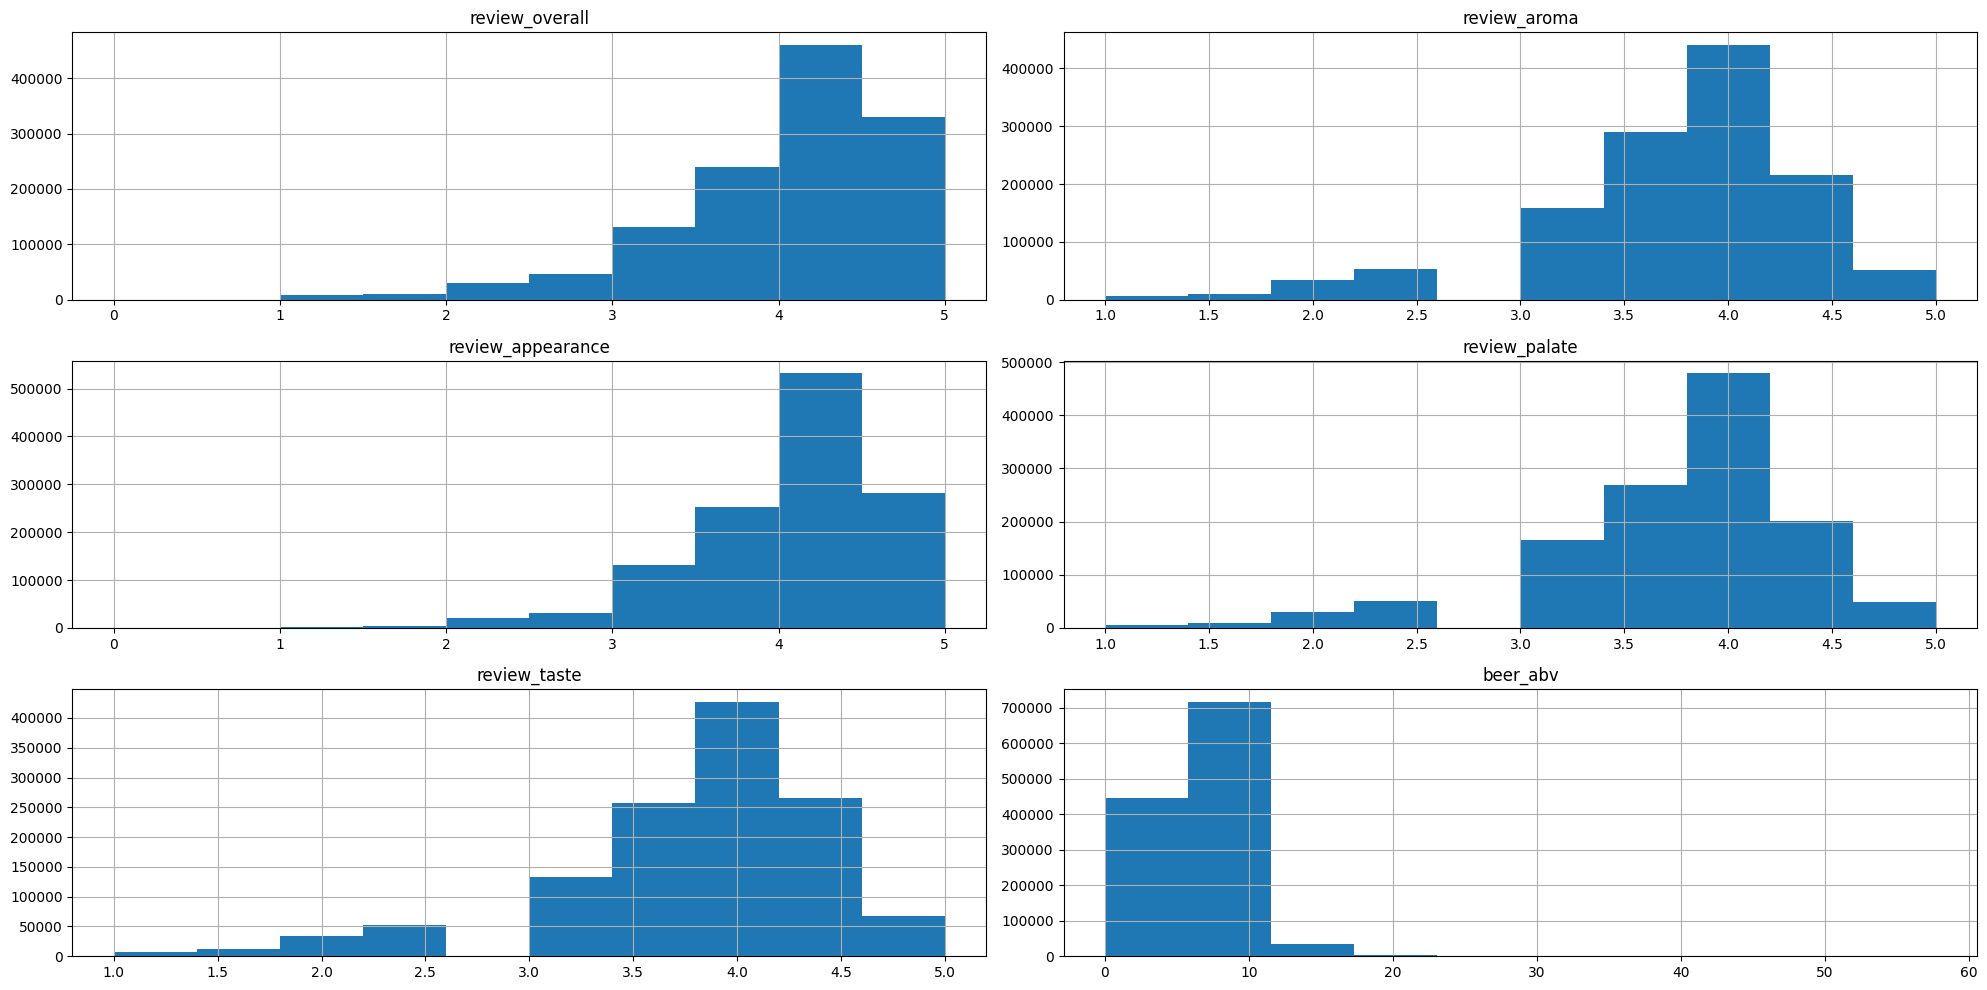

In [81]:
df_train.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

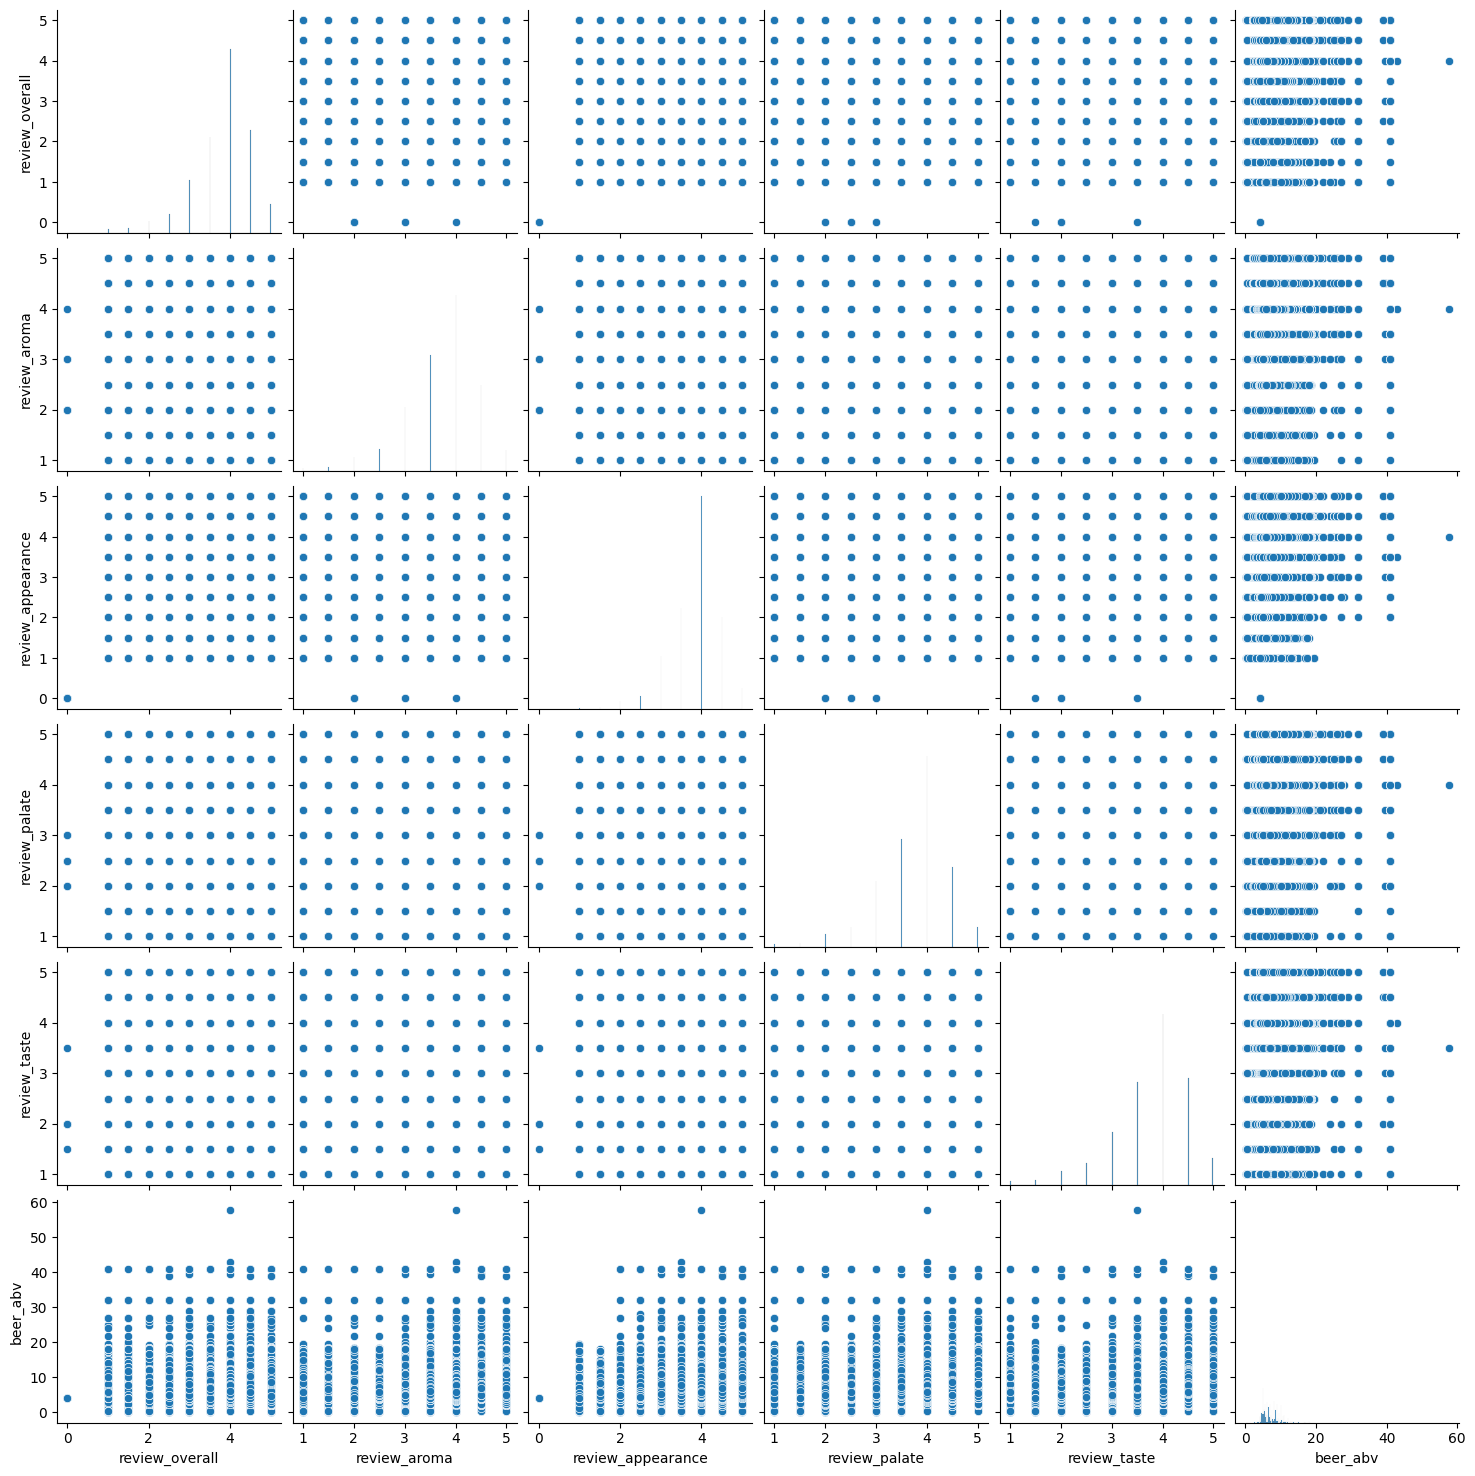

In [82]:
sns.pairplot(data=df_train)
plt.show()

Consejo RandomForest o Decission Tree GradientBoosting

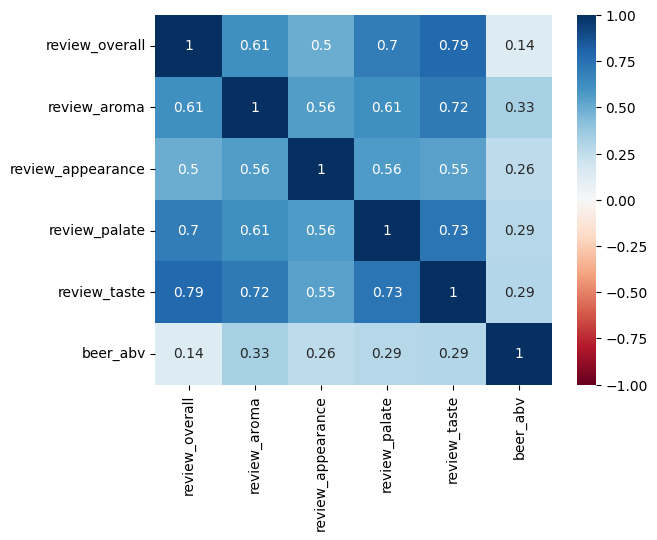

In [83]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin= -1, vmax= 1, annot= True, cmap="RdBu")
plt.show()

### **Análisis de outliers en `beer_abv`**

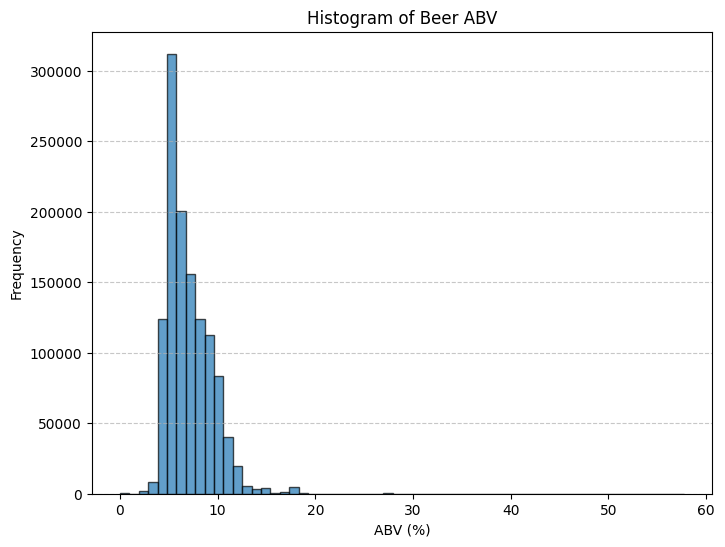

In [91]:

plt.figure(figsize=(8, 6))
plt.hist(df_train["beer_abv"], bins=60, edgecolor="black", alpha=0.7)
plt.title("Histogram of Beer ABV")
plt.xlabel("ABV (%)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [92]:
# MEJORAR VISTA
display(df_train['beer_abv'].describe())

count    1.204367e+06
mean     7.041271e+00
std      2.325635e+00
min      1.000000e-02
25%      5.200000e+00
50%      6.500000e+00
75%      8.500000e+00
max      5.770000e+01
Name: beer_abv, dtype: float64

In [93]:
counts = {
    'mayor_a_12': df_train[df_train['beer_abv'] > 12].shape[0],
    'mayor_a_15': df_train[df_train['beer_abv'] > 15].shape[0],
    'mayor_a_20': df_train[df_train['beer_abv'] > 20].shape[0],
    'mayor_a_25': df_train[df_train['beer_abv'] > 25].shape[0],
    'mayor_a_30': df_train[df_train['beer_abv'] > 30].shape[0],
    'mayor_a_40': df_train[df_train['beer_abv'] > 40].shape[0],
    'mayor_a_50': df_train[df_train['beer_abv'] > 50].shape[0],
}
total = df_train.shape[0]

# Mostrar los resultados
for umbral, cantidad in counts.items():
    porcentaje = (cantidad / total) * 100
    print(f'Cervezas con ABV {umbral.replace("_", " ")}: {cantidad} = {porcentaje:.2}%')


Cervezas con ABV mayor a 12: 23801 = 1.9%
Cervezas con ABV mayor a 15: 8290 = 0.66%
Cervezas con ABV mayor a 20: 602 = 0.048%
Cervezas con ABV mayor a 25: 511 = 0.041%
Cervezas con ABV mayor a 30: 145 = 0.012%
Cervezas con ABV mayor a 40: 62 = 0.0049%
Cervezas con ABV mayor a 50: 1 = 8e-05%


In [94]:
# Ejemplo de la cerveza > 50 abv (grado alcohólico)
beer_stronger = df_train[df_train["beer_abv"] > 50]
print(beer_stronger[["beer_style", "beer_abv"]])

      beer_style  beer_abv
12919    Eisbock      57.7


In [95]:
nulos_abv = df_train['beer_abv'].isnull().sum()
nulos_percent = nulos_abv / df_train.shape[0] * 100
print(f"Datos nulos en Beer_abv: {nulos_abv} = {nulos_percent:.2f}%")

Datos nulos en Beer_abv: 53241 = 4.23%


In [96]:
abv_mas_15 = df_train[df_train['beer_abv'] > 15]
porcentaje_mas_15 = (abv_mas_15.shape[0] / df_train.shape[0]) * 100
print(f"Cantidad de datos mayores a ABV>15%: {abv_mas_15.shape[0]} = {porcentaje_mas_15:.2f}%")

Cantidad de datos mayores a ABV>15%: 8290 = 0.66%


In [97]:
# Revisar cantidad de datos a eliminar entre abv_mas_15 y nulos_abv
total_abv_eliminar = abv_mas_15.shape[0] + nulos_abv
total_df_train = df_train.shape[0]
pocentaje_eliminar = total_abv_eliminar / total_df_train * 100
print(f"Total datos eliminar por beer_abv: {total_abv_eliminar} = {pocentaje_eliminar:.2f}%")

Total datos eliminar por beer_abv: 61531 = 4.89%


### **Observaciones:**

**Ejemplos de rangos de ABV según el estilo:**

- Pilsner: 4.5% - 5.5%
- IPA: 6% - 8% (aunque pueden llegar a 10% o más)
- Stout: 4% - 8% (las Imperial Stout pueden superar el 10%)
- Barley Wine: 10% - 12% o más

**Sí, existen cervezas con un ABV superior al 12%.**

Estas cervezas suelen pertenecer a estilos como:

- Imperial Stout: Conocidas por su cuerpo robusto, sabores complejos y alto contenido alcohólico.
- Barley Wine: Cervezas fuertes y maltosas, con un ABV que puede superar fácilmente el 12%.
- Quadrupel: Cervezas belgas de abadía, muy fuertes y con sabores complejos.
Algunas cervezas artesanales experimentales incluso pueden alcanzar ABV mucho más altos, llegando a 20% o más.

**Algunas de las cervezas más fuertes del mundo son:**

- Snake Venom: Esta cerveza escocesa de la cervecería Brewmeister tiene un ABV de 67,5%.
- Armageddon: Esta cerveza escocesa de la cervecería Brewmeister tiene un ABV de 65%.
- Start the Future: Esta cerveza holandesa de la microcervecería Koelschip tiene un ABV de 60%.
- Strength in Numbers: Esta cerveza es el resultado de la colaboración entre la cervecería escocesa BrewDog y la alemana Schorschbräu, y tiene un ABV de 57,8%.
- **Schorschbock 57**% finis coronat opus: Esta cerveza alemana de la cervecería Schorschbräu tiene un ABV de 57,7%.
- The End of History: Esta cerveza belga de la cervecería BrewDog tiene un ABV de 55%.
- Koelschip Obilix: Esta cerveza holandesa de la cervecería Koelschip tiene un ABV de 45%.
- Schorschbock 43: Esta cerveza alemana de la cervecería Schorschbräu tiene un ABV de 43%.


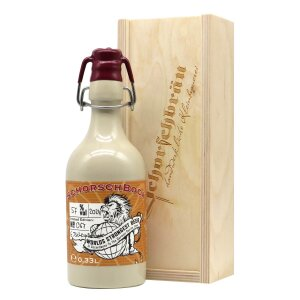
#### **Schorschbräu schorschbock 57**

### **Conclusiones de beer_abv**

- Datos nulos en `beer_abv`: son menos del 5% y por lo tanto podemos eliminarlos.
- Existe complicaciones para imputar los datos nulos por el amplio espectro (0 - 57).
- Se recomienda verificar en el modelo la importancia de esta variable.

### **Conclusiones:**
- Observamos que existen datos de `beer_abv` como atipicos que corresponden a cervezas con mayor grado alcohólico (ABV) del 15%. Estas cervezas son especiales o pueden ser artesanales. Cantidad de datos mayores a ABV>15%: 8403 = 0.66%
- Observamos que existen datos nulos en Beer_abv: 54084 = 4.26%
- Por lo tanto, eliminaremos los datos nulos de `beer_abv` y los que son mayores al 15% de ABV `beer_abv`, que son Total datos eliminar: 62487 = 4.92%

# **Preprocesamiento de datos:**
Limpieza de los datos con las consideraciones anteriores, sobre el ABV.

In [146]:
# Eliminar datos por beer_abv
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .drop(['index', 'brewery_name', 'beer_beerid', 'brewery_id', 'beer_name', 'review_time'], axis=1)
    .drop_duplicates()
    .astype({'review_profilename': 'category',
             'beer_style': 'category',
    })
    .dropna(subset=['beer_abv'])
    .loc[lambda x: x['beer_abv'] <= 15]
)

df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1495024 entries, 0 to 1586613
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   review_overall      1495024 non-null  float64 
 1   review_aroma        1495024 non-null  float64 
 2   review_appearance   1495024 non-null  float64 
 3   review_profilename  1494691 non-null  category
 4   beer_style          1495024 non-null  category
 5   review_palate       1495024 non-null  float64 
 6   review_taste        1495024 non-null  float64 
 7   beer_abv            1495024 non-null  float64 
dtypes: category(2), float64(6)
memory usage: 88.2 MB


In [147]:
df = df_interim.copy()

In [109]:
# TOP 10 de cervezas

# Calcular conteos y porcentajes de cada estilo de cerveza
beer_style_counts = df['beer_style'].value_counts()
beer_style_percentages = (beer_style_counts / len(df)) * 100

# Crear un DataFrame con los estilos, conteos y porcentajes
beer_style_summary = pd.DataFrame({
    'estilo': beer_style_counts.index,
    'cont': beer_style_counts.values,
    'porcentaje': beer_style_percentages.values
})

# Columna porcentaje acumulativo
beer_style_summary['porcentaje_acumulado'] = beer_style_summary['porcentaje'].cumsum()

# Ordenar por conteos y mostrar el top 10
top_10_styles = beer_style_summary.head(10)

# Formatear el porcentaje para una visualización más clara
top_10_styles['porcentaje'] = top_10_styles['porcentaje'].map(lambda x: f"{x:.2f}%")
top_10_styles['porcentaje_acumulado'] = top_10_styles['porcentaje_acumulado'].map(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame
display(top_10_styles)

/var/folders/ng/0jqzg2q54n3fn46813w3kjrr0000gn/T/ipykernel_93748/4135647506.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_styles['porcentaje'] = top_10_styles['porcentaje'].map(lambda x: f"{x:.2f}%")
/var/folders/ng/0jqzg2q54n3fn46813w3kjrr0000gn/T/ipykernel_93748/4135647506.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_styles['porcentaje_acumulado'] = top_10_styles['porcentaje_acumulado'].map(lambda x: f"{x:.2f}%")


,estilo,cont,porcentaje,porcentaje_acumulado
0,American IPA,114613,7.29%,7.29%
1,American Double / Imperial IPA,84405,5.37%,12.66%
2,American Pale Ale (APA),62466,3.97%,16.63%
3,Russian Imperial Stout,53642,3.41%,20.05%
4,American Double / Imperial Stout,50325,3.20%,23.25%
5,American Porter,50024,3.18%,26.43%
6,American Amber / Red Ale,45279,2.88%,29.31%
7,Belgian Strong Dark Ale,37246,2.37%,31.68%
8,Fruit / Vegetable Beer,33697,2.14%,33.82%
9,American Strong Ale,31734,2.02%,35.84%


In [76]:
df['beer_style'].describe()

count          1508361
unique             104
top       American IPA
freq            113164
Name: beer_style, dtype: object

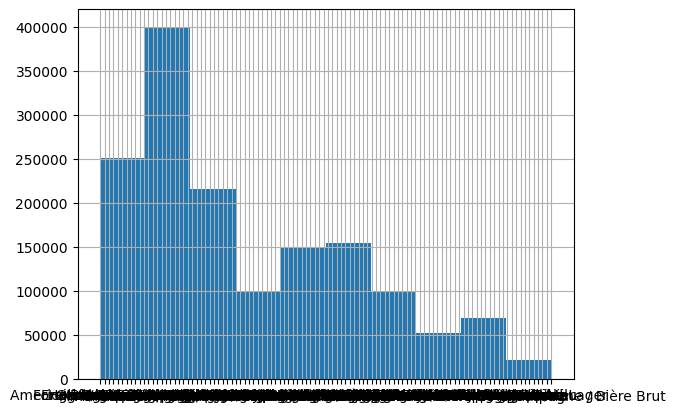

In [75]:
df['beer_style'].hist()
plt.show()

In [123]:
# Obtener los estilos únicos
estilos = df['beer_style'].unique()

# Dividir los estilos en bloques de 50
estilos_bloques = [estilos[i:i+50] for i in range(0, len(estilos), 50)]

# Mostrar los bloques como DataFrames
for idx, bloque in enumerate(estilos_bloques):
    df_bloque = pd.DataFrame(bloque, columns=["beer_style"])
    print(f"Bloque {idx + 1} (Estilos {idx * 50 + 1} a {idx * 50 + len(bloque)})")
    display(df_bloque)
    print("\n")

Bloque 1 (Estilos 1 a 50)


,beer_style
0,Hefeweizen
1,English Strong Ale
2,Foreign / Export Stout
3,German Pilsener
4,American Double / Imperial IPA
5,Herbed / Spiced Beer
6,Light Lager
7,Oatmeal Stout
8,American Pale Lager
9,Rauchbier




Bloque 2 (Estilos 51 a 100)


,beer_style
0,Vienna Lager
1,American Amber / Red Lager
2,Scottish Ale
3,Witbier
4,American Black Ale
5,Saison / Farmhouse Ale
6,English Barleywine
7,English Dark Mild Ale
8,California Common / Steam Beer
9,Czech Pilsener




Bloque 3 (Estilos 101 a 104)


,beer_style
0,Gose
1,Happoshu
2,Sahti
3,Bière de Champagne / Bière Brut


### **Consideraciones:**
- Existen 104 estilos de cerveza, para poder trabajar en unu modelo se reocomienda agruparlos entre 5 a 10 estilos.
- El sitio web de [BeerAdvocate - Estilos](https://www.beeradvocate.com/beer/styles/) tiene una sección en la que presenta una clasificación.

### **Propuesta de clasificación:**
El criterio para reducir la cantidad de estilos será agrupar por tipos de cerveza, teniendo como resultado:
1. Ale (Macro estilo)
- Brown Ales (Estilo)
    - Altbier
    - American Brown Ale
    - Belgian Dark Ale
    - English Brown Ale
    - English Dark Mild Ale
- Dark Ales (Estilo)
    - Dubbel
    - Roggenbier
    - Scottish Ale
    - Winter Warmer
- Strong Ales (Estilo)
    - American Barleywine
    - American Strong Ale
    - Belgian Dark Strong Ale
    - Belgian Pale Strong Ale
    - English Barleywine
    - English Strong Ale
    - Imperial Red Ale
    - Old Ale
    - Quadrupel (Quad)
    - Scotch Ale / Wee Heavy
    - Tripel
    - Wheatwine
2. India Pale Ales (Macro estilo)
- IPAs (Estilo)
    - American IPA
    - Belgian IPA
    - Black IPA
    - Brut IPA
    - English IPA
    - Imperial IPA
    - Milkshake IPA
    - New England IPA
3. Lager (Macro estilo)
- Dark Lager (Estilo)
    - American Amber / Red Lager
    - Czech Amber Lager
    - Czech Dark Lager
    - European Dark Lager
    - Märzen
    - Munich Dunkel
    - Rauchbier
    - Schwarzbier
    - Vienna Lager
- Pale Lager (Estilo)
    - American Adjunct Lager
    - American Lager
    - Bohemian / Czech Pilsner
    - Czech Pale Lager
    - European / Dortmunder Export Lager
    - European Pale Lager
    - European Strong Lager
    - Festbier / Wiesnbier
    - German Pilsner
    - Helles
    - Imperial Pilsner
    - India Pale Lager (IPL)
    - Kellerbier / Zwickelbier
    - Light Lager
    - Malt Liquor
- Bocks (Estilo)
    - Bock
    - Doppelbock
    - Eisbock
    - Maibock
    - Weizenbock
4. Porter / Stout (Macro estilo)
- Porter (Estilo)
    - American Porter
    - Baltic Porter
    - English Porter
    - Imperial Porter
    - Robust Porter
    - Smoked Porter
- Stout (Estilo)
    - American Imperial Stout
    - American Stout
    - English Stout
    - Foreign / Export Stout
    - Irish Dry Stout
    - Oatmeal Stout
    - Russian Imperial Stout
    - Sweet / Milk Stout
5. Exotic (Macro estilo)
- Hybrid Beers (Estilo)
    - Bière de Champagne / Bière Brut
    - Braggot
    - California Common / Steam Beer
    - Cream Ale
- Specialty Beers (Estilo)
    - Chile Beer
    - Fruit and Field Beer
    - Gruit / Ancient Herbed Ale
    - Happoshu
    - Herb and Spice Beer
    - Japanese Rice Lager
    - Kvass
    - Low-Alcohol Beer
    - Pumpkin Beer
    - Rye Beer
    - Sahti
    - Smoked Beer
6. Weiss (Macro estilo)
- Wheat Beers (Estilo)
    - American Dark Wheat Beer
    - American Pale Wheat Beer
    - Dunkelweizen
    - Grodziskie
    - Hefeweizen
    - Kristallweizen
    - Witbier
7. Wild / Sour (Macro estilo)
- Wild / Sour Beers (Estilo)
    - Berliner Weisse
    - Brett Beer
    - Faro
    - Flanders Oud Bruin
    - Flanders Red Ale
    - Fruit Lambic
    - Fruited Kettle Sour
    - Gose
    - Gueuze
    - Lambic
    - Wild Ale

In [119]:
beer_style = df['beer_style'].unique()
beer_style_df = pd.DataFrame(beer_style)
beer_style_df.to_csv("../data/raw/beer_style.csv", index=False)

In [125]:
# Clasificación de estilos
df_estilos = pd.read_csv("../data/raw/clasificacion_cervezas.csv")
df_estilos.head()

,beer_style,style,macro_style
0,Bock,Bocks,Lager
1,Doppelbock,Bocks,Lager
2,Eisbock,Bocks,Lager
3,Maibock,Bocks,Lager
4,Weizenbock,Bocks,Lager


In [149]:
# Unir dataset con la clasificación de estilos de cerveza
df_merge = pd.merge(df, df_estilos, on='beer_style', how='left')
df_merge.head()

,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,style,macro_style
0,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,5.0,Wheat Beers,Weiss
1,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,6.2,Strong Ales,Ale
2,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,6.5,Stouts,Porter/Stout
3,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,5.0,Pale Lagers,Lager
4,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,7.7,India Pale Ales,IPAs


In [150]:
# Cambiar tipo de dato category a: style y macro_style
df_merge['beer_style'] = df_merge['beer_style'].astype('category')
df_merge['style'] = df_merge['style'].astype('category')
df_merge['macro_style'] = df_merge['macro_style'].astype('category')


df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495024 entries, 0 to 1495023
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   review_overall      1495024 non-null  float64 
 1   review_aroma        1495024 non-null  float64 
 2   review_appearance   1495024 non-null  float64 
 3   review_profilename  1494691 non-null  category
 4   beer_style          1495024 non-null  category
 5   review_palate       1495024 non-null  float64 
 6   review_taste        1495024 non-null  float64 
 7   beer_abv            1495024 non-null  float64 
 8   style               1495024 non-null  category
 9   macro_style         1495024 non-null  category
dtypes: category(4), float64(6)
memory usage: 79.7 MB


In [152]:
df = df_merge.copy()

# EDA

In [153]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1196019 entries, 42982 to 121958
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   review_overall      1196019 non-null  float64 
 1   review_aroma        1196019 non-null  float64 
 2   review_appearance   1196019 non-null  float64 
 3   review_profilename  1195749 non-null  category
 4   beer_style          1196019 non-null  category
 5   review_palate       1196019 non-null  float64 
 6   review_taste        1196019 non-null  float64 
 7   beer_abv            1196019 non-null  float64 
 8   style               1196019 non-null  category
 9   macro_style         1196019 non-null  category
dtypes: category(4), float64(6)
memory usage: 73.1 MB


In [156]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
review_overall,1196019.0,3.824542,0.715892,0.00,3.5,4.0,4.5,5.0
review_aroma,1196019.0,3.743518,0.695285,1.00,3.5,4.0,4.0,5.0
review_appearance,1196019.0,3.849347,0.614851,0.00,3.5,4.0,4.0,5.0
review_palate,1196019.0,3.751620,0.678919,1.00,3.5,4.0,4.0,5.0
review_taste,1196019.0,3.802181,0.728155,1.00,3.5,4.0,4.5,5.0
beer_abv,1196019.0,6.965129,2.121856,0.01,5.2,6.5,8.5,15.0


,count,unique,top,freq
review_profilename,1195749,30582,northyorksammy,4056
beer_style,1196019,104,American IPA,88343
style,1196019,14,Pale Ales,182129
macro_style,1196019,7,Ale,452509


La columna de `macro_style` será nuestra variable a predecir.

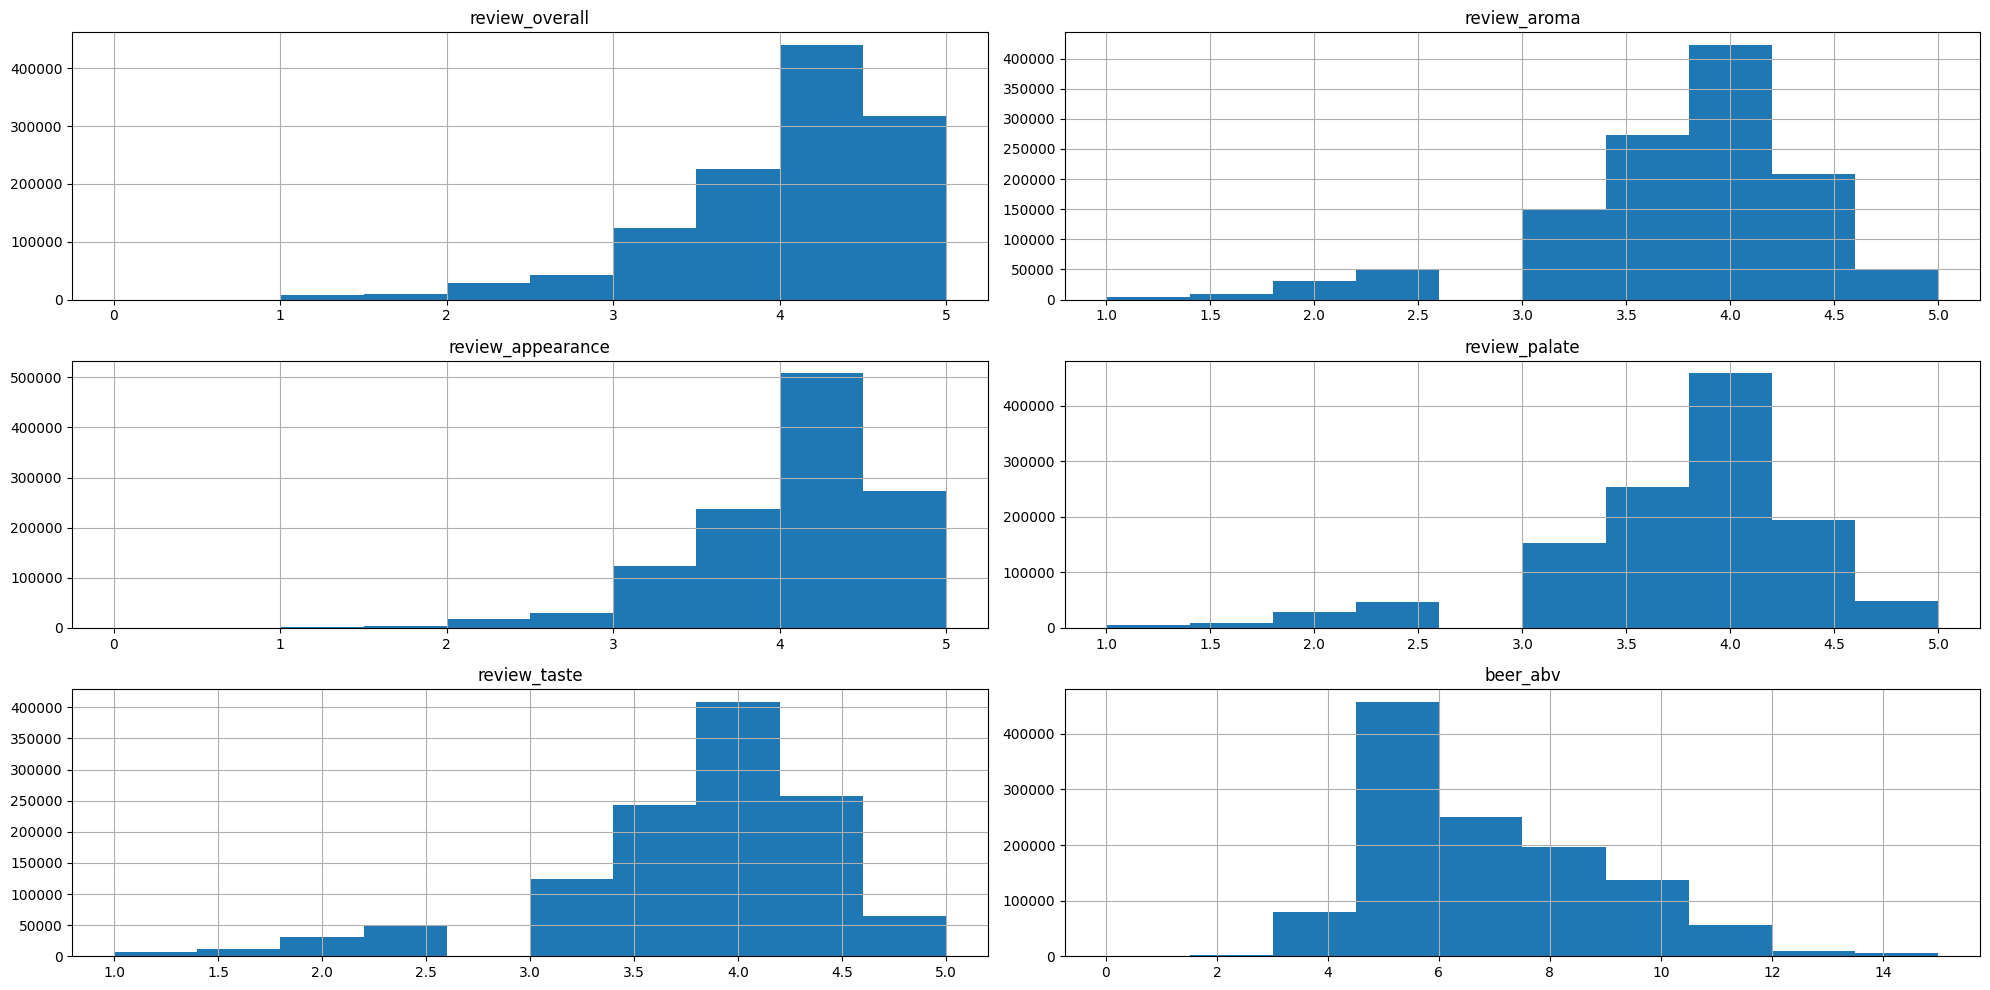

In [157]:
df_train.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

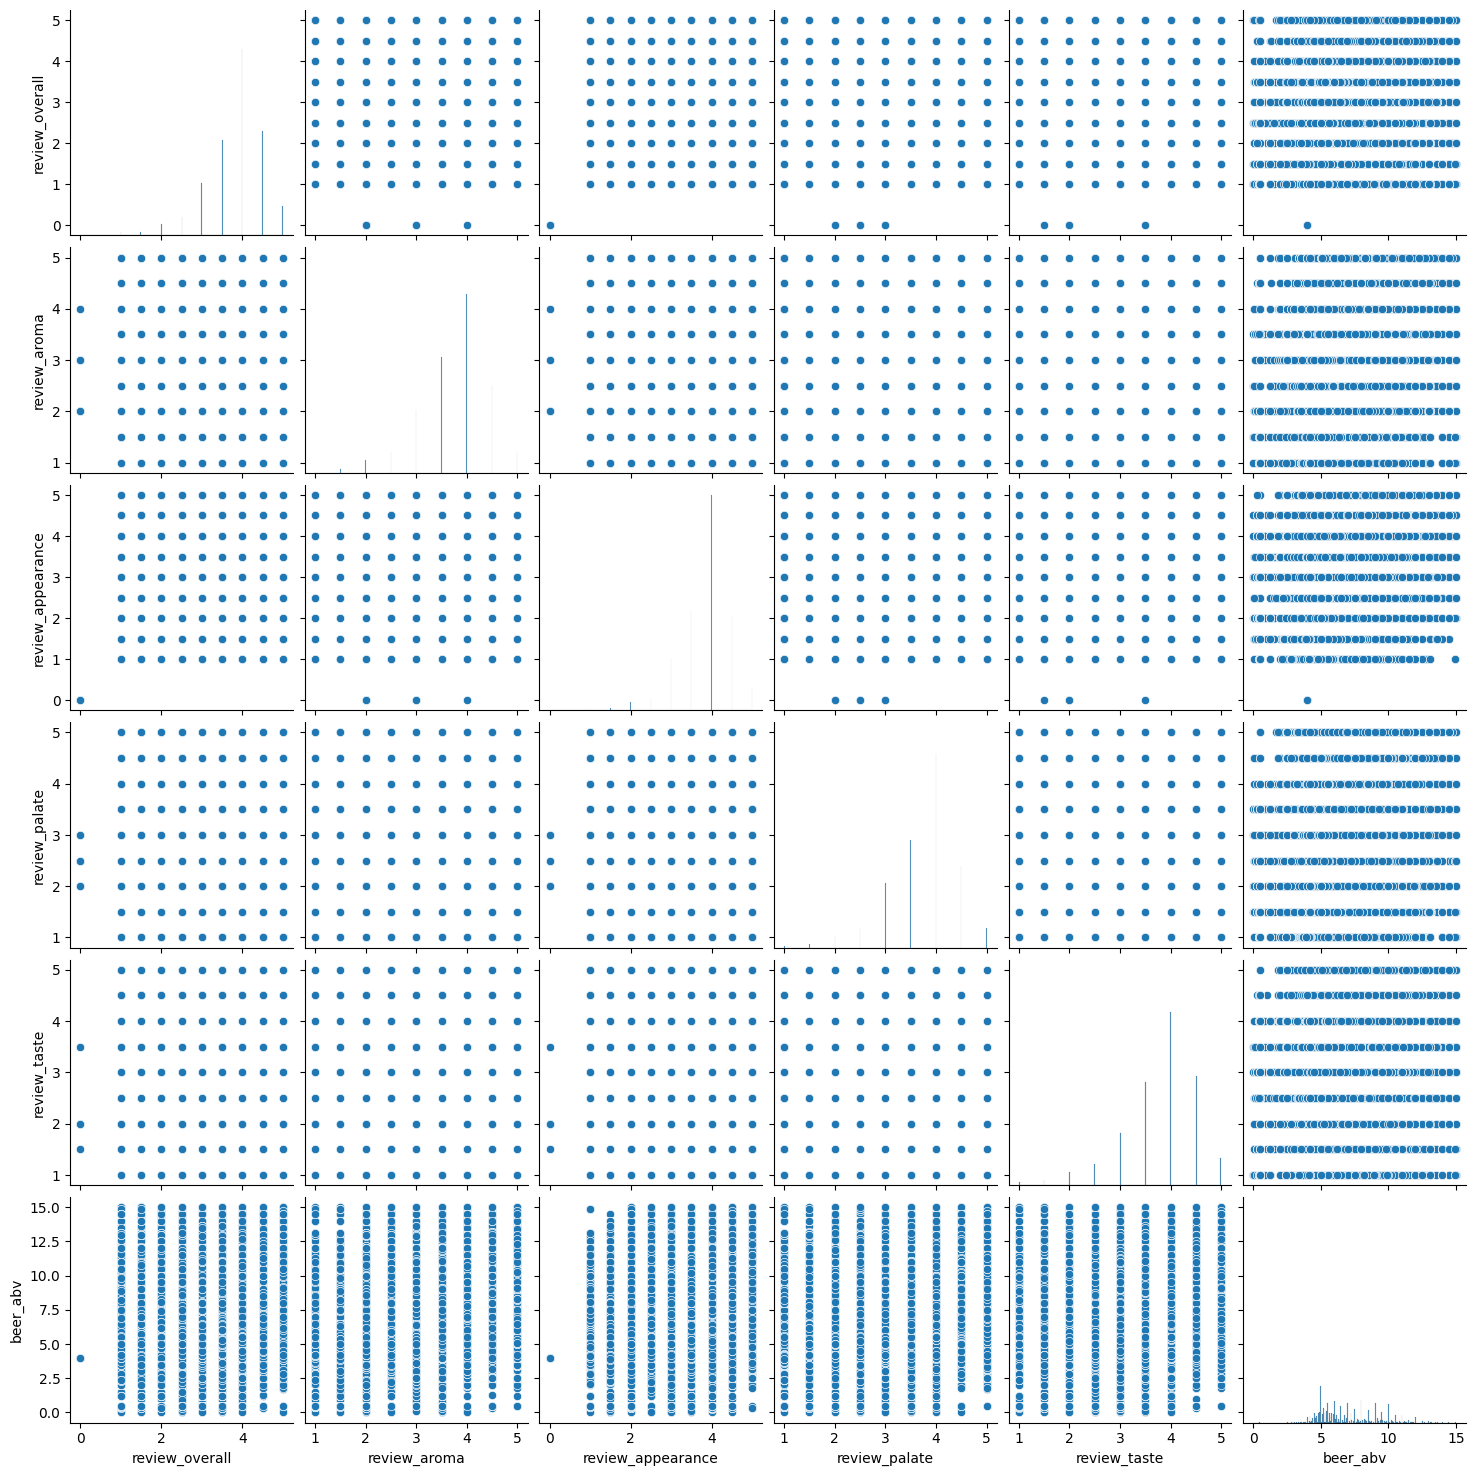

In [158]:
sns.pairplot(data=df_train)
plt.show()

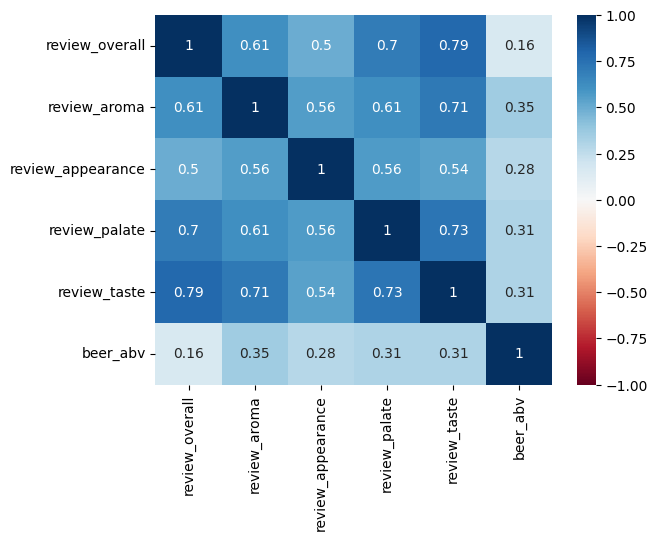

In [159]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin= -1, vmax= 1, annot= True, cmap="RdBu")
plt.show()

## **Modelamiento**

En el análisis bivariado se examinó la distribución de los datos, lo que permitió identificar patrones y relaciones clave entre las variables. Basándonos en estas observaciones, se recomienda utilizar los siguientes modelos de Machine Learning para el análisis:

- **Random Forest:** Ideal para capturar interacciones no lineales y manejar conjuntos de datos con características correlacionadas. Este modelo es robusto frente a valores atípicos y sobreajuste en comparación con modelos individuales.
- **Decision Tree:** Proporciona interpretabilidad clara al generar reglas basadas en los datos. Es útil como punto de partida para entender la estructura subyacente del problema.
- **Gradient Boosting:** Un modelo avanzado que optimiza iterativamente el rendimiento, ajustando los errores residuales. Es adecuado para problemas complejos y suele ofrecer un alto rendimiento predictivo.

Estos modelos fueron seleccionados por su capacidad para manejar la complejidad de los datos y por sus ventajas en la predicción de la variable objetivo.

### **Random Forest**

In [160]:
X_train = df_train.drop('macro_style', axis=1).reset_index(drop=True)
y_train = df_train['macro_style'].reset_index(drop=True)
X_test = df_test.drop('macro_style', axis=1).reset_index(drop=True)
y_test = df_test['macro_style'].reset_index(drop=True)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)